PTH and PTH_FC data analysis 

Part one: importing the data

In [1]:
import pandas as pd
import csv
import string
import numpy as np
import matplotlib.pyplot as plt #for plotting

In [2]:
class Run:
    def __init__(self,name="",protein="",concentration=0,model="oneToone",t=[],r=[]):
        self.name = name 
        self.protein = protein 
        self.concentrration = concentration
        self.model = model 
        self.t = t 
        self.r = r 
    

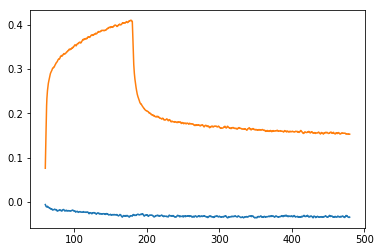

In [3]:
fileList = ['C:/Users/dexte/Desktop/pdata/A1.xls', 'C:/Users/dexte/Desktop/pdata/A2.xls', 'C:/Users/dexte/Desktop/pdata/A3.xls', 'C:/Users/dexte/Desktop/pdata/A4.xls', 'C:/Users/dexte/Desktop/pdata/B1.xls', 'C:/Users/dexte/Desktop/pdata/B2.xls', 'C:/Users/dexte/Desktop/pdata/B3.xls', 'C:/Users/dexte/Desktop/pdata/B4.xls', 'C:/Users/dexte/Desktop/pdata/C1.xls', 'C:/Users/dexte/Desktop/pdata/C2.xls', 'C:/Users/dexte/Desktop/pdata/C3.xls', 'C:/Users/dexte/Desktop/pdata/C4.xls', 'C:/Users/dexte/Desktop/pdata/D1.xls', 'C:/Users/dexte/Desktop/pdata/D2.xls', 'C:/Users/dexte/Desktop/pdata/D3.xls', 'C:/Users/dexte/Desktop/pdata/D4.xls', 'C:/Users/dexte/Desktop/pdata/E1.xls', 'C:/Users/dexte/Desktop/pdata/E2.xls', 'C:/Users/dexte/Desktop/pdata/E3.xls', 'C:/Users/dexte/Desktop/pdata/E4.xls', 'C:/Users/dexte/Desktop/pdata/F1.xls', 'C:/Users/dexte/Desktop/pdata/F2.xls', 'C:/Users/dexte/Desktop/pdata/F3.xls', 'C:/Users/dexte/Desktop/pdata/F4.xls', 'C:/Users/dexte/Desktop/pdata/F4.xls', 'C:/Users/dexte/Desktop/pdata/G1.xls', 'C:/Users/dexte/Desktop/pdata/G3.xls', 'C:/Users/dexte/Desktop/pdata/H1.xls', 'C:/Users/dexte/Desktop/pdata/H3.xls']
#make a file list 
isFc = [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,0, 0, 1,0,1]

t_array = []
r_array = []
run_array = []
conc_array = []
run_num = 0
for file in fileList:
    with open(file,'r') as csvFile:
        rowNum = 1 
        fReader = csv.reader(csvFile)
        conc = 0 
        t = []
        r = []
        for row in fReader:
            if(rowNum==2):
                conc = row[0].split("\t")[1]
            if(rowNum >= 6): 
                t.append(float(row[0].split("\t")[0]))
                r.append(float(row[0].split("\t")[1]))


            rowNum = rowNum + 1 
    t_array.append(t)
    r_array.append(r)
    conc_array.append(conc)
    
    if(isFc[run_num]):
        protein_name = "PTH-Fc"
    else:
        protein_name = "PTH"
    
    tmpRun = Run(str(run_num),protein_name,conc,"oneToone",t,r)
    run_array.append(tmpRun)
    
    run_num = run_num + 1 

plt.plot(tmpRun.t,tmpRun.r,t_array[3],r_array[4],'-')

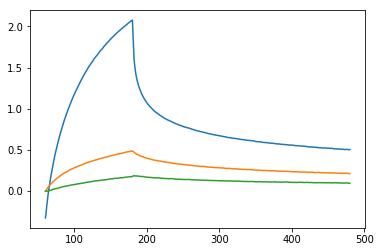

In [38]:
for run in run_array:
    if(run.protein == "PTH-Fc" and np.max(run.r)>0.1):
        plt.figure(1)
        plt.plot(run.t,run.r,'-')
        print()

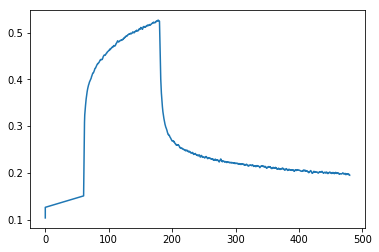

In [21]:
#making Fc and PTH only run arrays
PTHFc_runs = []
PTH_runs = []
numPTHruns = len(isFc)-sum(isFc)
numPTHFcruns = sum(isFc)
PTHFc_data = np.ndarray(shape=(numPTHFcruns+1,len(run_array[0].r))) #should be fixed so run_array isn't 0
PTH_data = np.ndarray(shape=(numPTHruns+1,len(run_array[0].r)))
i = 1 
j = 1 
for runs in run_array:
    if(runs.protein=="PTH-Fc"):
        PTHFc_runs.append(runs)
        PTHFc_data[i,:] = runs.r
        if(i==1):
            PTHFc_data[i-1,:] = runs.t
        i = i + 1 
    else:
        PTH_runs.append(runs)
        PTH_data[j,:] = runs.r
        if(j==1):
            PTHFc_data[j-1,:] = runs.t
        j = j + 1 
plt.plot(PTH_data[0,:],PTH_data[1,:])

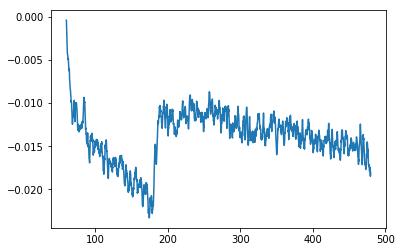

In [20]:
plt.figure(1)
plt.plot(t_array[13],r_array[15],'-')
#print(t_array[0])
plt.show()